# Problema 1

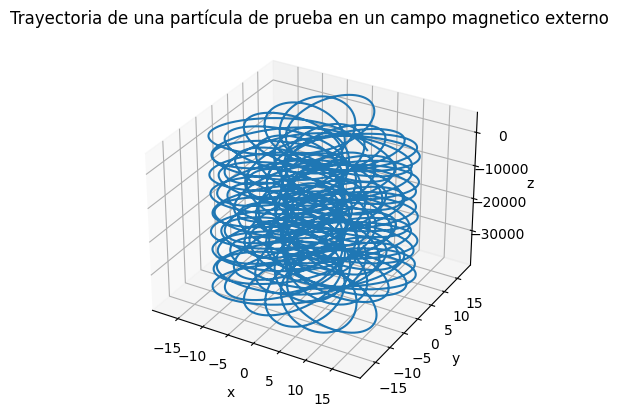

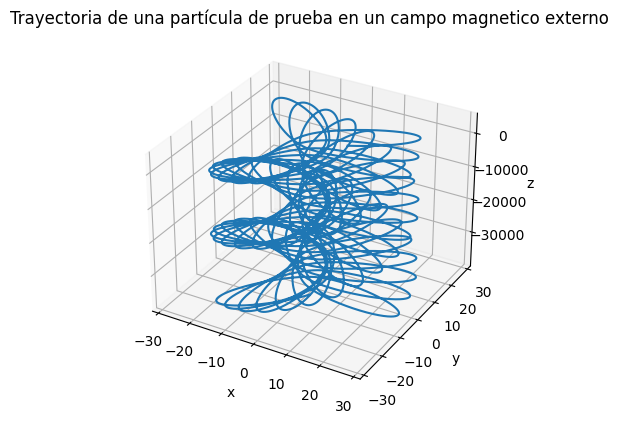

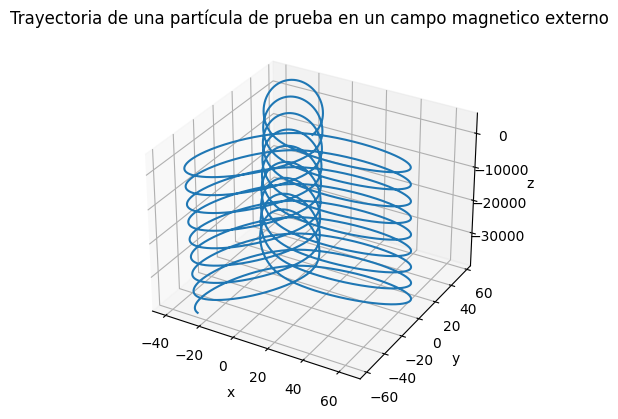

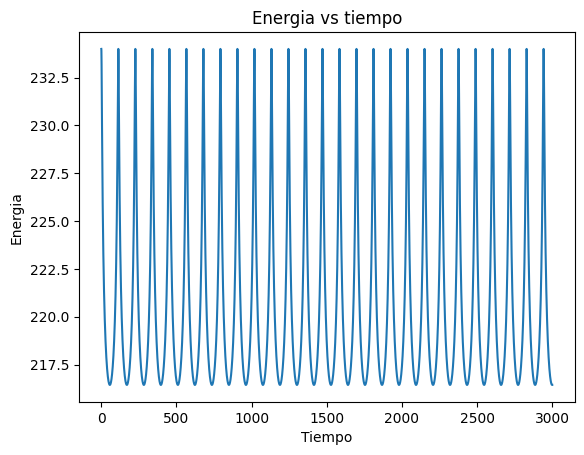

In [6]:
import numpy as np
import matplotlib.pyplot as plt

q = 1
I = 1
u_0 = 1
m = 1

#x1 es rho , x2 es phi , x3 es z

def system(t, y):
    x1, v1, x2, v2, x3, v3 = y
    

    # Equations of motion
    dx1dt = v1
    dv1dt = q*I*u_0*v3/(2*np.pi*m*x1) + x1*v2**2
    dx2dt = v2
    dv2dt = - 2*v1*v2/x1
    dx3dt = v3
    dv3dt = q*I*u_0*v1/(2*np.pi*x1)
    
    return [dx1dt, dv1dt, dx2dt, dv2dt, dx3dt, dv3dt]

# Método Runge Kutta de 4to orden 

def RungeKutta4(t, y, h):
    k1 = np.array(system(t, y))
    k2 = np.array(system(t + h / 2, y + h / 2 * k1))
    k3 = np.array(system(t + h / 2, y + h / 2 * k2))
    k4 = np.array(system(t + h, y + h * k3))
    return y + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4)

# Initial conditions
y0 = [10, -1.3 , 0 , 0.122 , 5000 , -15 ]  # Condicion inicial 1
y1 = [10, 2 , 0 , 0.1 , 5000 , -15]    # Condicion inicial 2
y2 = [10, 0 , 0 , 0.3, 5000 ,-15]   # Condicion inicial 3

t0 = 0
tf = 3000
h = 0.01
n_steps = int((tf - t0) / h)

t_values = np.linspace(t0, tf, n_steps)

for y0 in y0,y1,y2:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    y_values = np.zeros((n_steps, len(y0)))
    y_values[0] = y0
    for i in range(1, n_steps):
        y_values[i] = RungeKutta4(t_values[i - 1], y_values[i - 1], h)

    x1 = y_values[:,0]
    v1 = y_values[:,1]
    x2 = y_values[:,2]
    v2 = y_values[:,3]
    z  = y_values[:,4]
    v3 = y_values[:,5]


    x = x1 * np.cos(x2)
    y = x1 * np.sin(x2)

    

    ax.plot(x, y, z)
    ax.set_title('Trayectoria de una partícula de prueba en un campo magnetico externo')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z') 

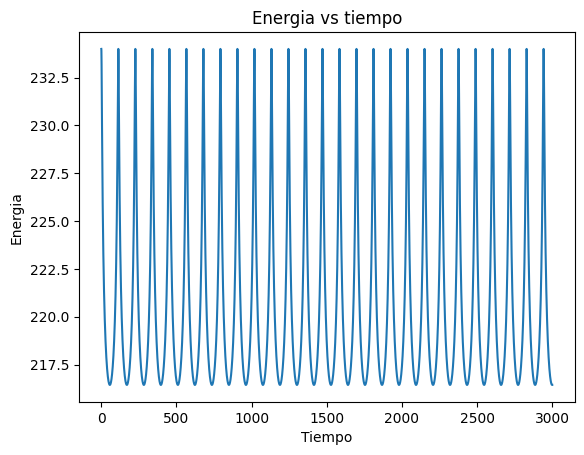

In [5]:
E = v1**2+x1**2*v2**2+v3**2

plt.figure()
plt.plot(t_values,E)
plt.title('Energia vs tiempo')
plt.xlabel('Tiempo')
plt.ylabel('Energia')


# Problema 3